## Importar libreria

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [2]:
df_country = pd.read_csv('./data/Country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Manejar valores nulos

In [4]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Validando duplicados

In [5]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Análisis de distribución

In [6]:
int_cols = df_country.select_dtypes(exclude='object').columns
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

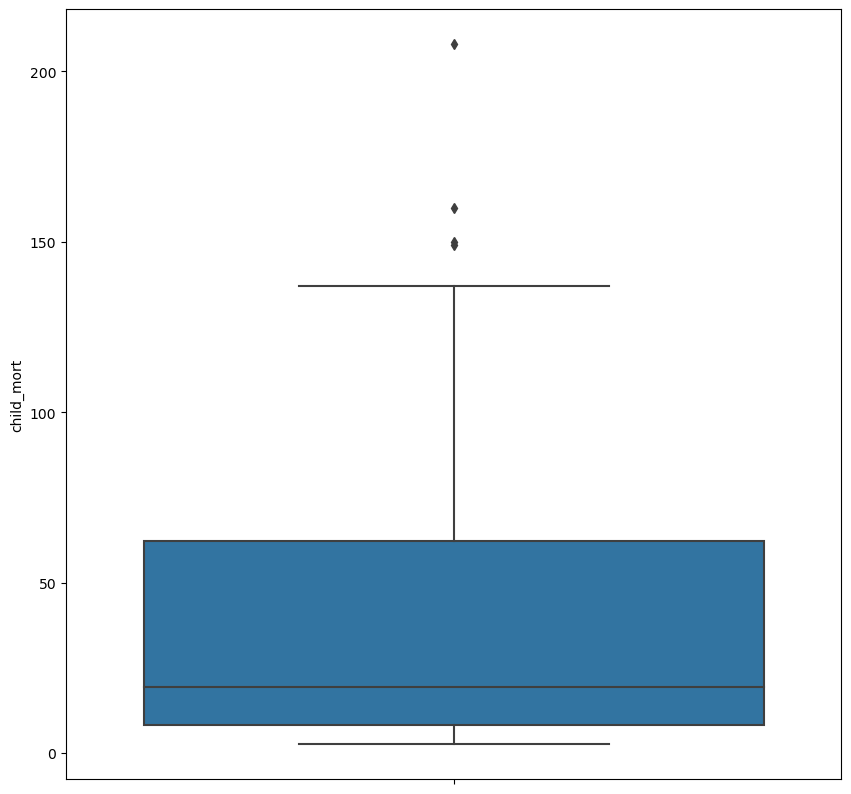

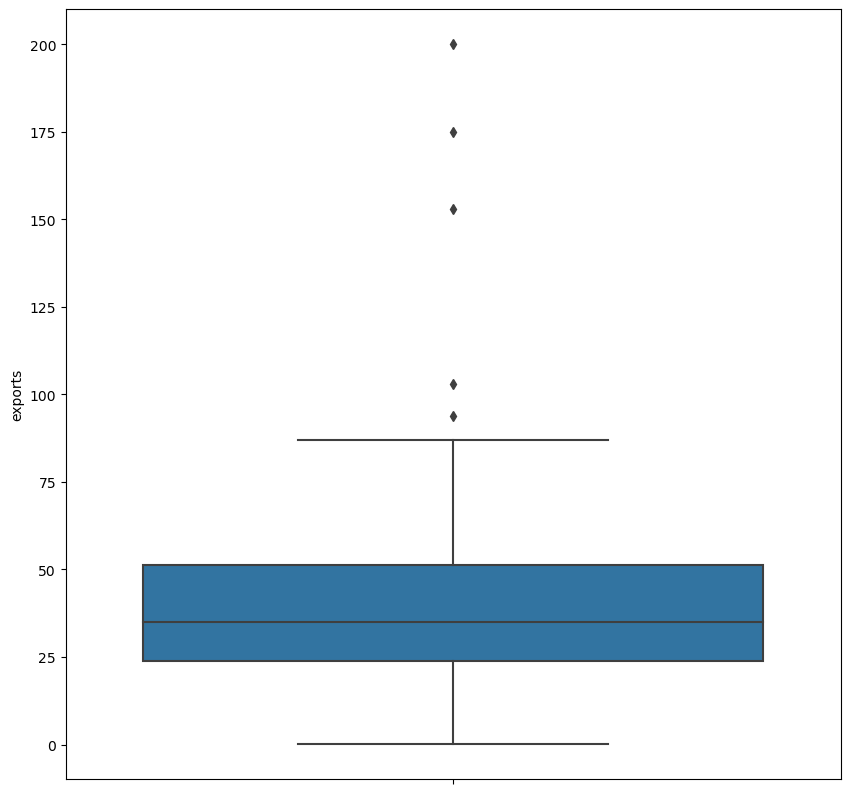

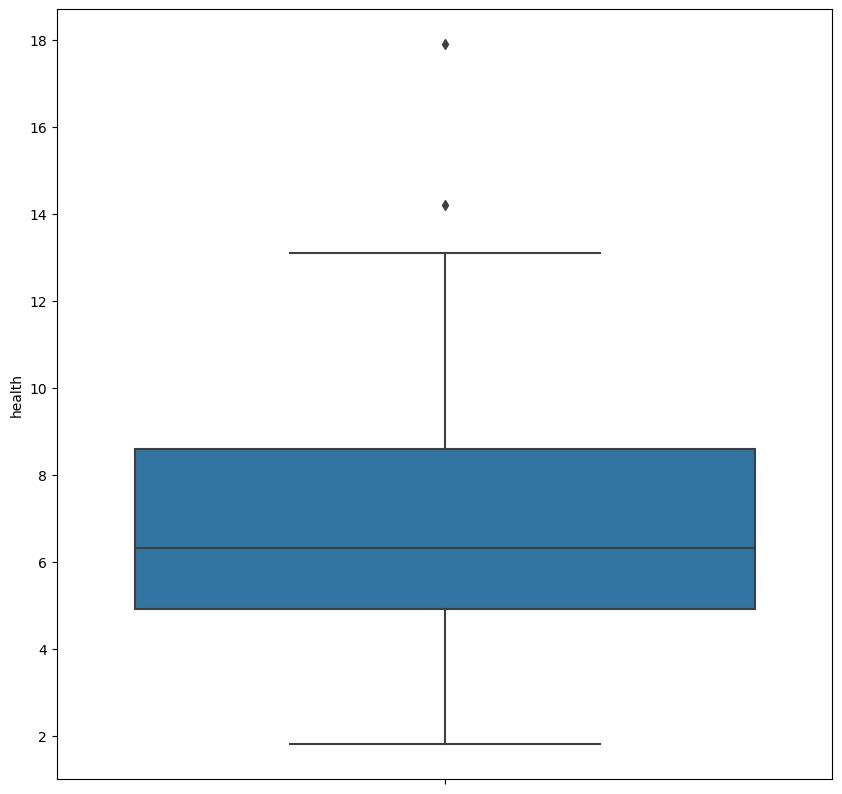

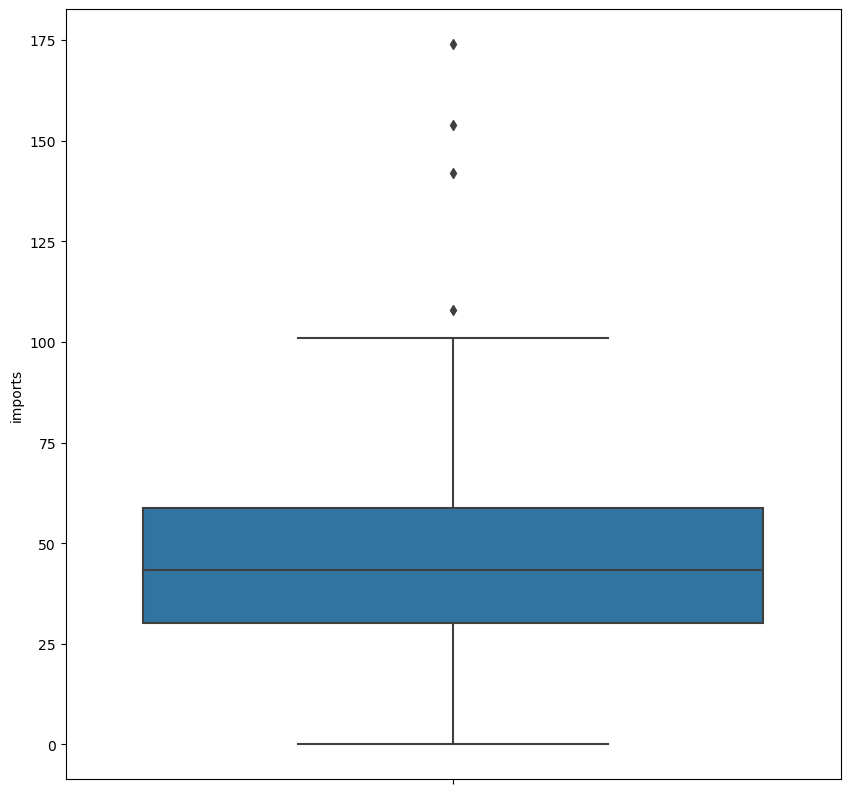

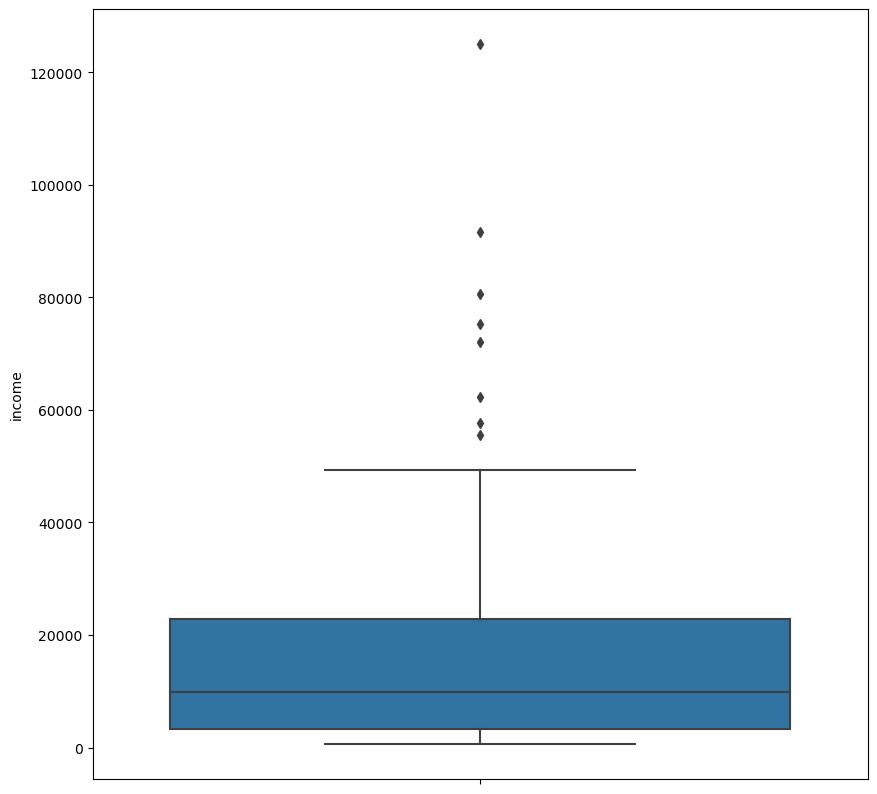

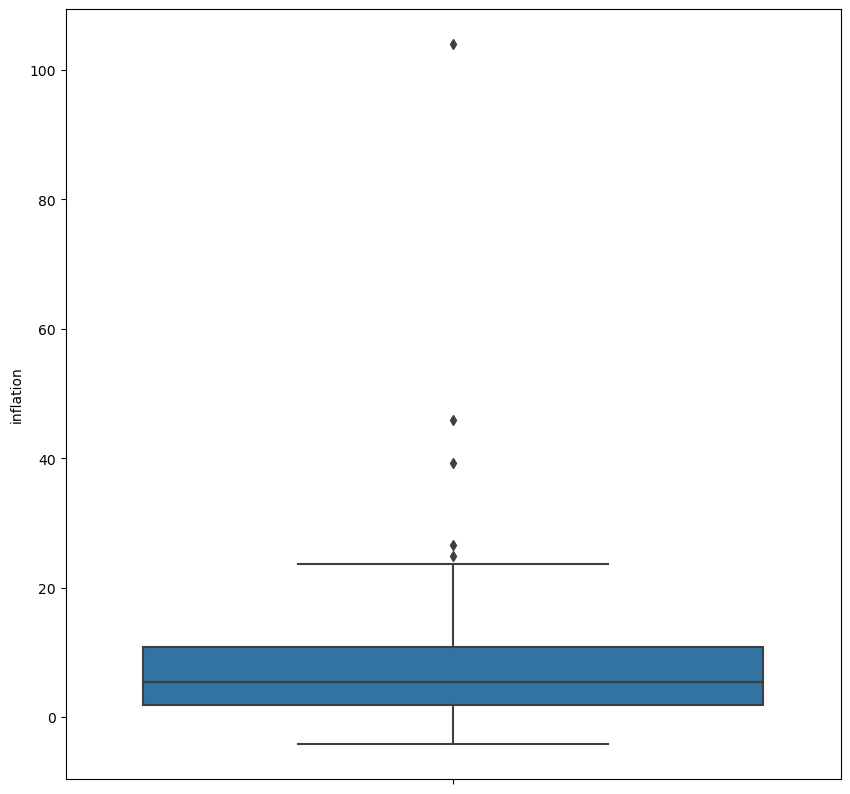

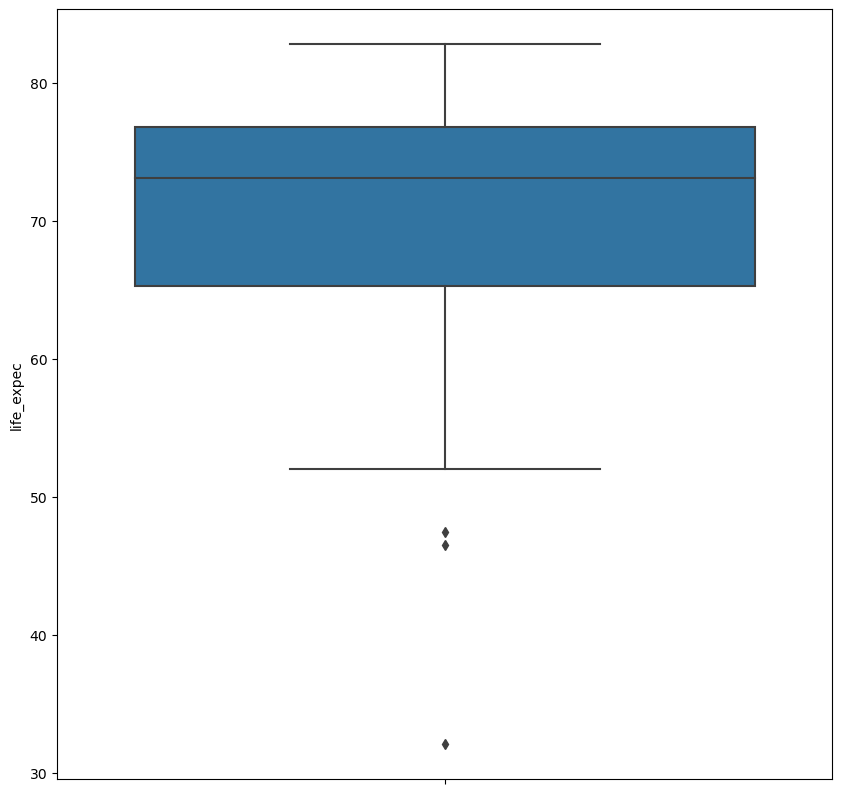

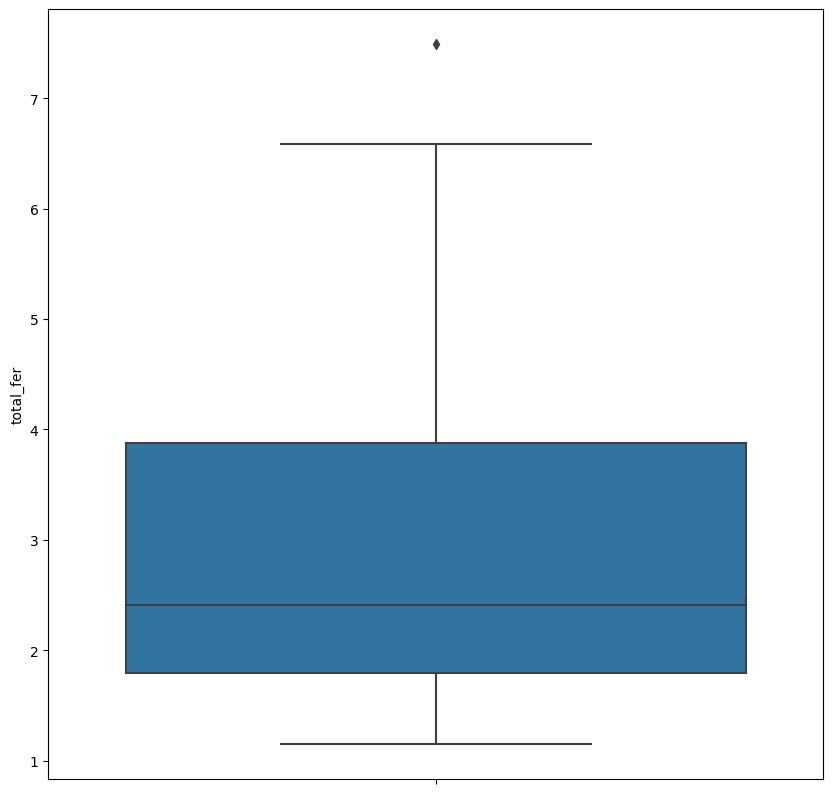

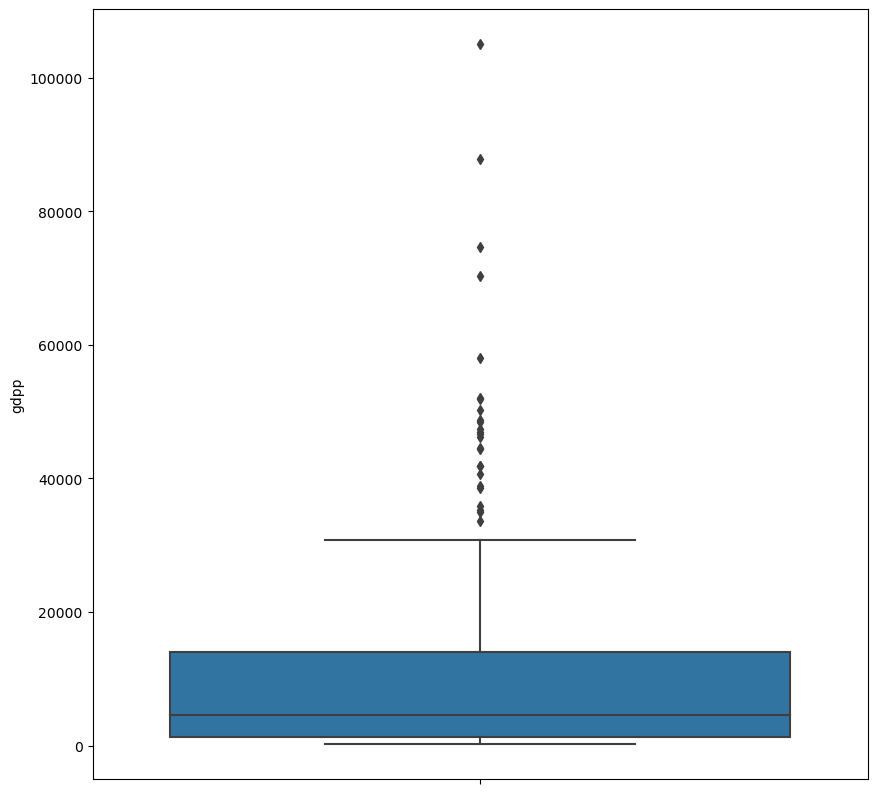

In [7]:
for _ in int_cols:
    plt.figure(figsize=(10, 10))
    sns.boxplot(data=df_country, y=_)
    plt.show()

<Axes: >

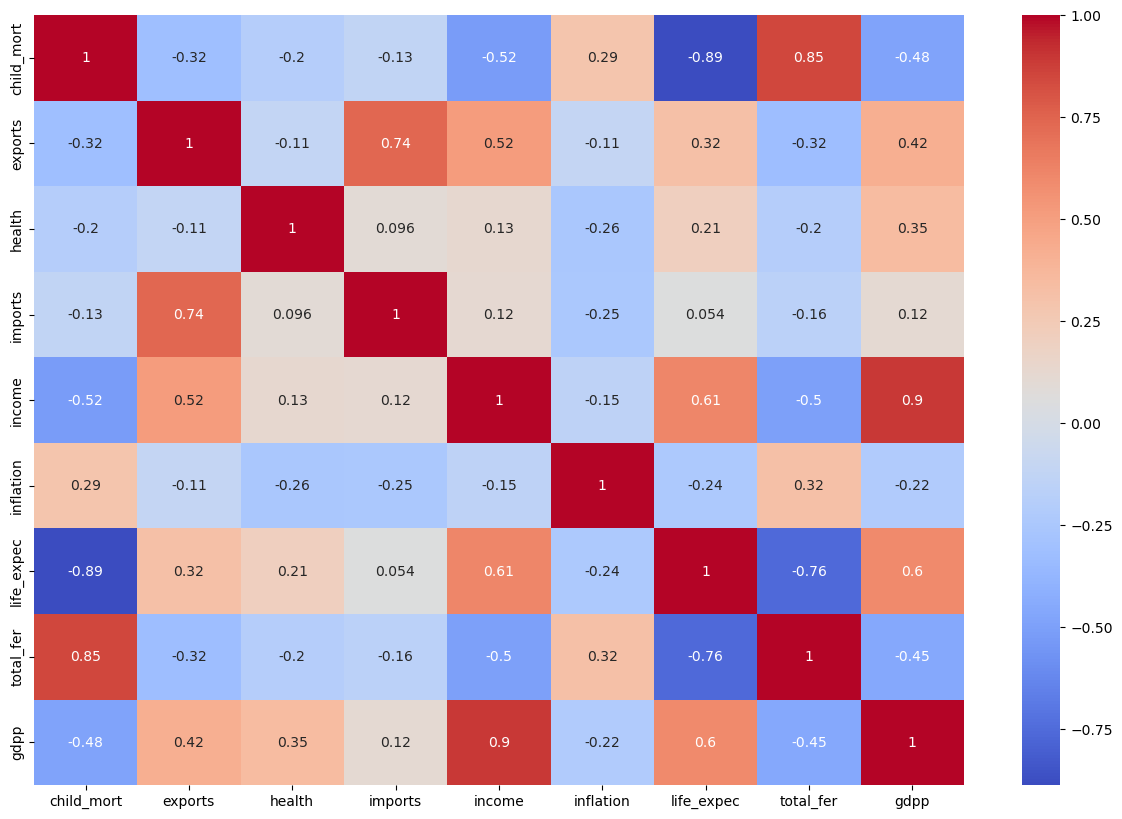

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_country.corr(numeric_only=True), annot=True, cmap='coolwarm')

## Escalar datos

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country.drop('country', axis=1))


In [10]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns=df_country.drop('country', axis=1).columns)
df_country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Reducción de dimensionalidad
Consiste en tomar todas las dimensiones que se encuentran en un Dataset y redicirlas sin perder la varianza de los datos.

### PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [13]:
# Indicar que dimensiones necesito, para ello se evalua el indice de varianza
var = pca.explained_variance_ratio_
print(var)


[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


Text(0, 0.5, '% Variance')

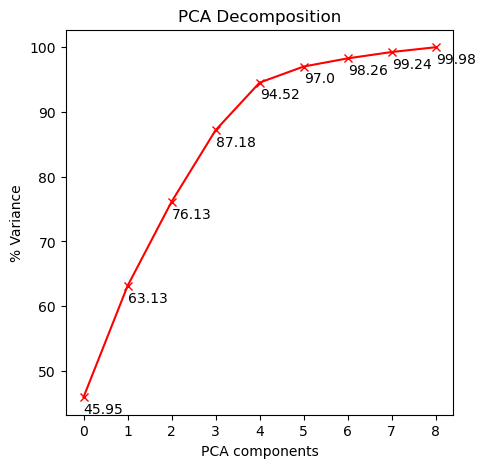

In [14]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
components = list(range(0,9))
plt.figure(figsize=(5,5))
for s,d in zip(components,cum_var):
    plt.annotate(np.round(d,decimals=2), xy=(s,d-2.5))

plt.plot(components,cum_var, 'r-x')
plt.title("PCA Decomposition")
plt.xlabel('PCA components')
plt.ylabel('% Variance')

In [15]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4, 5, 6, 7, 8], axis=1, inplace=True)

In [16]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## K-means

In [18]:
sum_of_scared_distances = []
silhouette_scores = []
K = range(2, 15)
for _ in K:
    km = KMeans(n_clusters=_, n_init='auto')
    y= km.fit_predict(pca_data_standard)
    sum_of_scared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard, y))

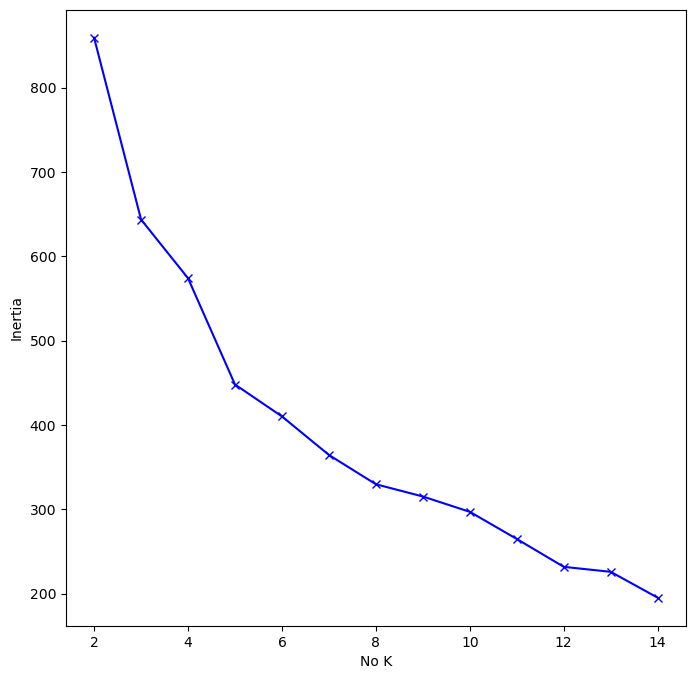

In [19]:
plt.figure(figsize=(8, 8))
plt.plot(K, sum_of_scared_distances, 'bx-')
plt.xlabel('No K')
plt.ylabel('Inertia')
plt.show()

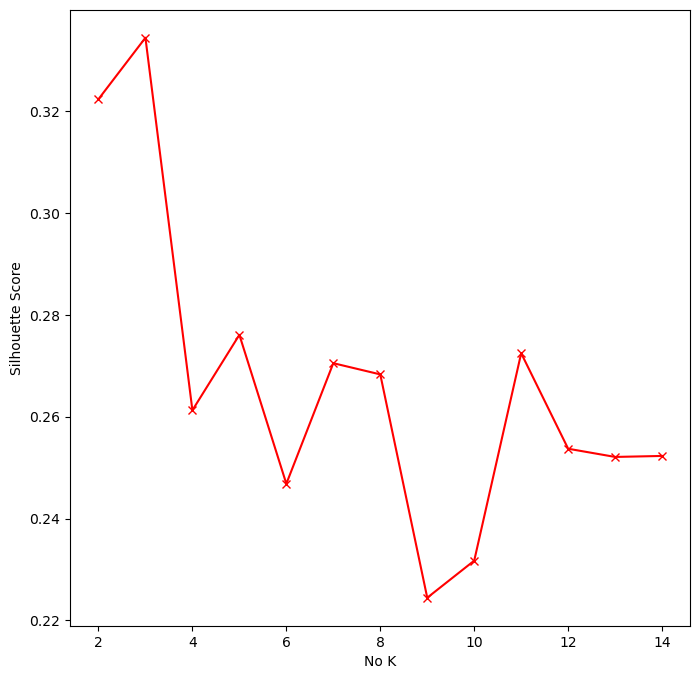

In [20]:
plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('No K')
plt.ylabel('Silhouette Score')
plt.show()

In [21]:
km = KMeans(n_clusters=4, n_init='auto')
y= km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_country['k_means_pca'] = y 

0.35491314499063326


## Sin PCA

In [22]:
sum_of_scared_distances = []
silhouette_scores = []
K = range(2, 15)
for _ in K:
    km = KMeans(n_clusters=_, n_init='auto')
    y= km.fit_predict(df_country_scaled)
    sum_of_scared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled, y))

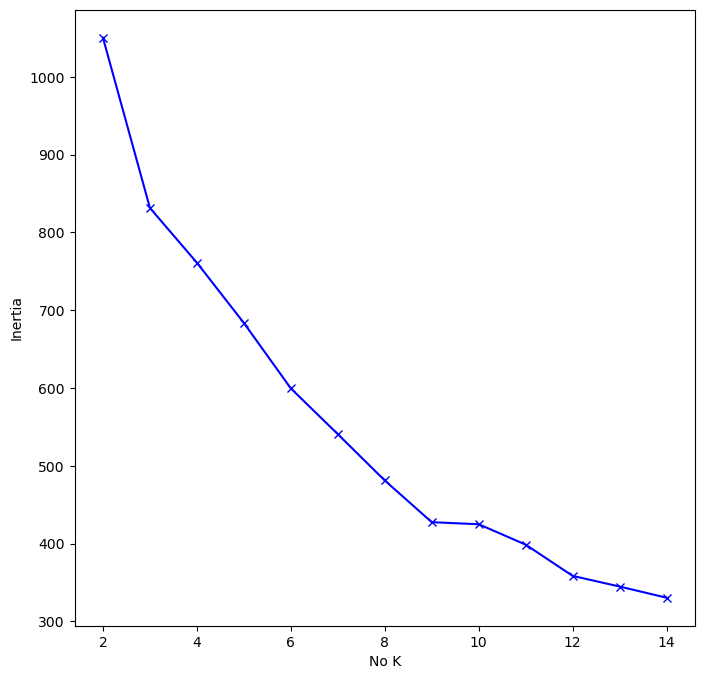

In [23]:
plt.figure(figsize=(8, 8))
plt.plot(K, sum_of_scared_distances, 'bx-')
plt.xlabel('No K')
plt.ylabel('Inertia')
plt.show()

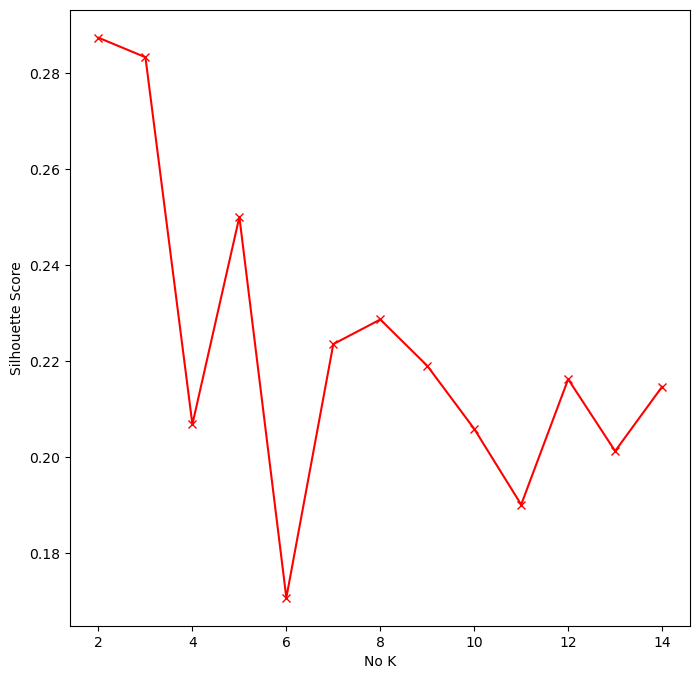

In [24]:
plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('No K')
plt.ylabel('Silhouette Score')
plt.show()

In [25]:
km = KMeans(n_clusters=3, n_init='auto')
y= km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y))
df_country['k_means'] = y 

0.28329575683463126


## Agglomerativen hierarchical clustering

### PCA

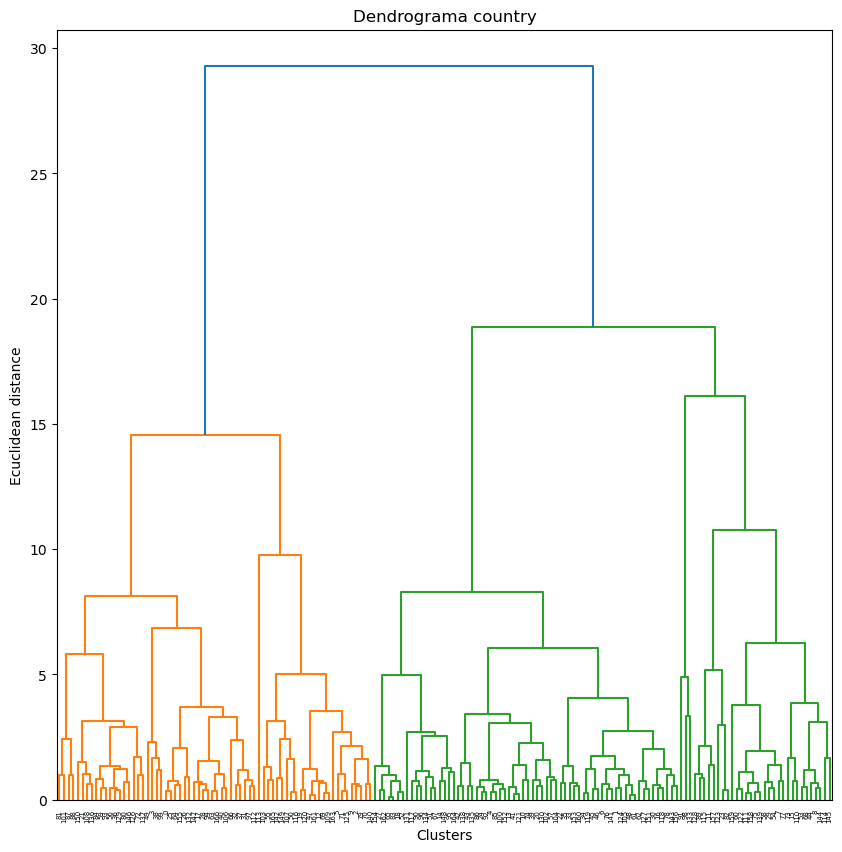

In [26]:
fig = plt.figure(figsize=(10, 10))
dendogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Ecuclidean distance')
plt.show()

In [27]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))
df_country['hc_pca'] = y_hc

0.3070110704080525


### Sin PCA

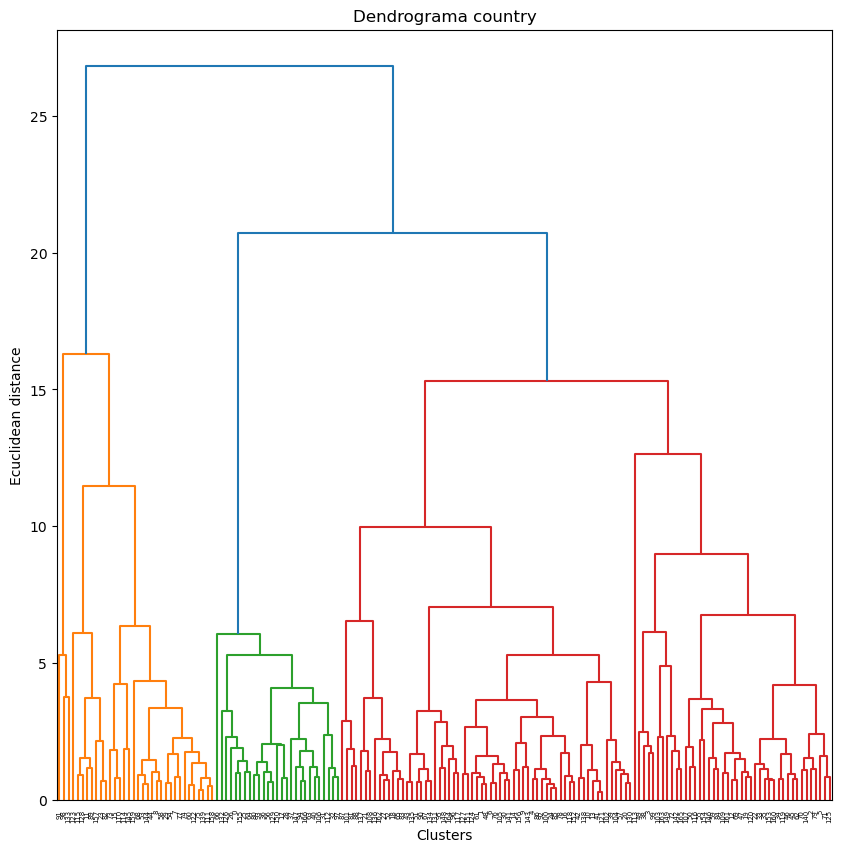

In [28]:
fig = plt.figure(figsize=(10, 10))
dendogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Ecuclidean distance')
plt.show()

In [29]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_hc))
df_country['hc'] = y_hc

0.3153134331018189


## DBSCAN

### PCA

In [30]:
from sklearn.neighbors import NearestNeighbors

In [31]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

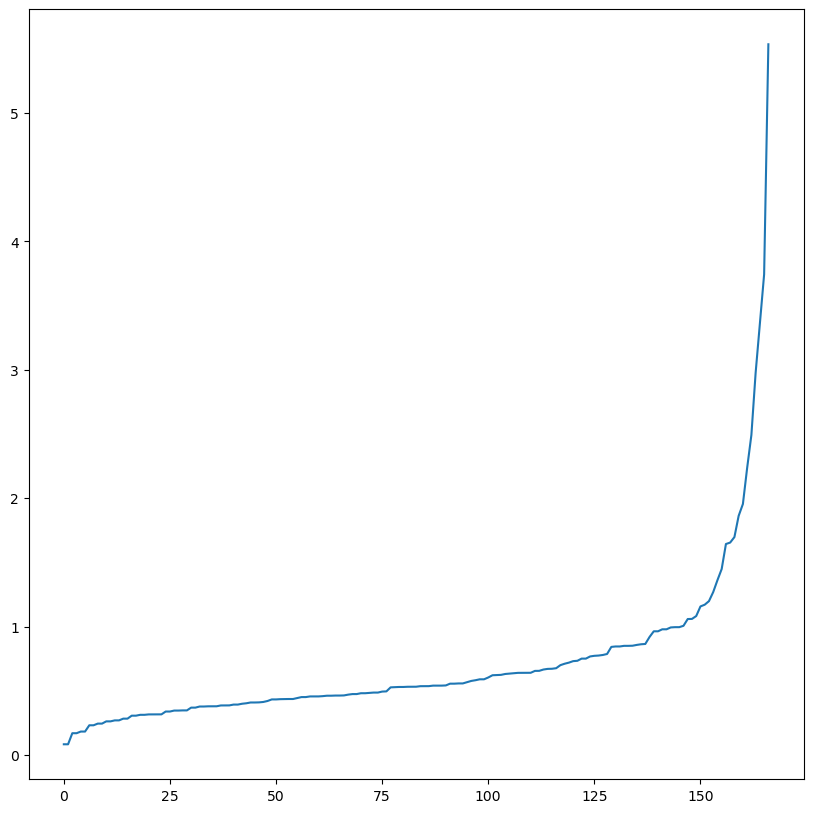

In [32]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
fig = plt.figure(figsize=(10, 10))
plt.plot(distances)

In [33]:
eps_values = np.arange(0.5, 2, 0.1)
min_samples = np.arange(3, 12)

In [34]:
from itertools import product

In [35]:
dbscan_paramns = list(product(eps_values, min_samples))

In [36]:
no_of_clusters = []
sil_scores = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    no_of_clusters.append(len(np.unique(y_dbscan)))
    try:
        sil_scores.append(silhouette_score(pca_data_standard, y_dbscan))
    except:
        sil_scores.append(0)
    

In [37]:
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['eps', 'min_samples'])
df_paramns_tunning['sil_scores'] = sil_scores
df_paramns_tunning['no_of_clusters'] = no_of_clusters
df_paramns_tunning.head()

,eps,min_samples,sil_scores,no_of_clusters
0,0.5,3,-0.290614,8
1,0.5,4,-0.346912,8
2,0.5,5,-0.270847,3
3,0.5,6,-0.270847,3
4,0.5,7,-0.192021,2


In [38]:
pivot_data_1 = pd.pivot_table(df_paramns_tunning, values='sil_scores', index='min_samples', columns='eps')
pivot_data_2 = pd.pivot_table(df_paramns_tunning, values='no_of_clusters', index='min_samples', columns='eps')

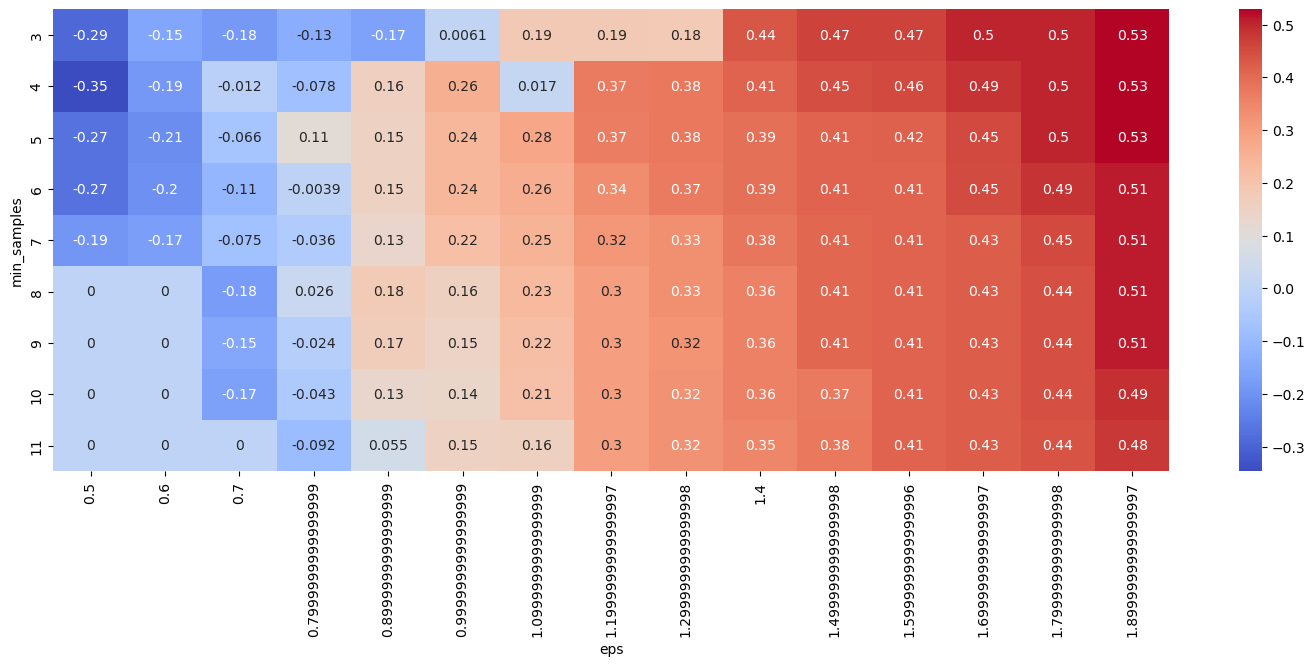

In [39]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(data=pivot_data_1, annot=True, annot_kws={'size': 10}, cmap='coolwarm', ax=ax)
plt.show()

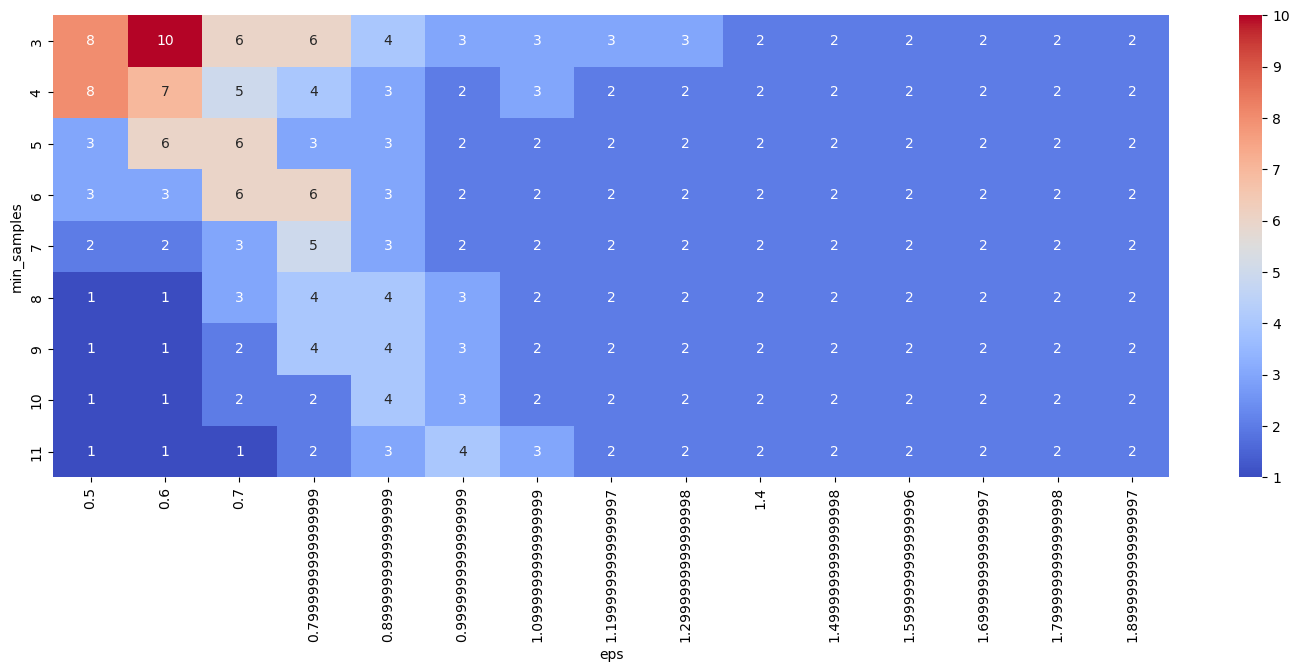

In [40]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(data=pivot_data_2, annot=True, annot_kws={'size': 10}, cmap='coolwarm', ax=ax)
plt.show()

In [41]:
dbscan = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_dbscan))
df_country['dbscan_pca'] = y_dbscan

0.18591175730784348


### Sin PCA

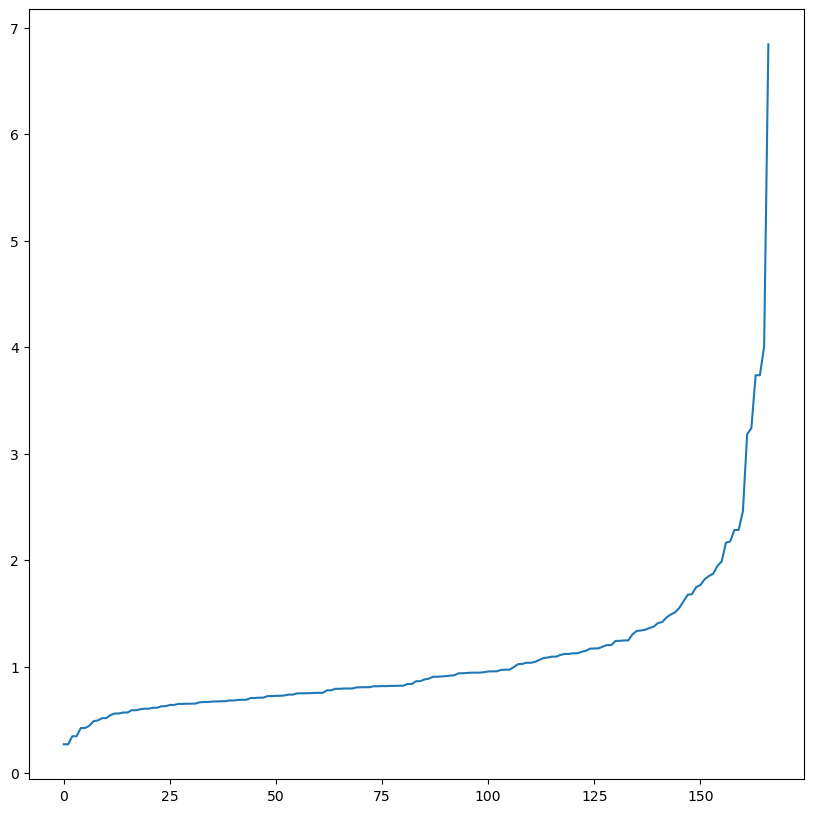

In [42]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaled)
distances, indices = neighbors_fit.kneighbors(df_country_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
fig = plt.figure(figsize=(10, 10))
plt.plot(distances)

In [43]:
eps_values = np.arange(1, 3, 0.1)
min_samples = np.arange(3, 12)

In [44]:
dbscan_paramns = list(product(eps_values, min_samples))
no_of_clusters = []
sil_scores = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
    no_of_clusters.append(len(np.unique(y_dbscan)))
    try:
        sil_scores.append(silhouette_score(df_country_scaled, y_dbscan))
    except:
        sil_scores.append(0)

In [45]:
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['eps', 'min_samples'])
df_paramns_tunning['sil_scores'] = sil_scores
df_paramns_tunning['no_of_clusters'] = no_of_clusters
df_paramns_tunning.head()

,eps,min_samples,sil_scores,no_of_clusters
0,1.0,3,0.011714,7
1,1.0,4,-0.031864,5
2,1.0,5,-0.024819,4
3,1.0,6,0.009157,3
4,1.0,7,-0.020091,3


In [46]:
pivot_data_1 = pd.pivot_table(df_paramns_tunning, values='sil_scores', index='min_samples', columns='eps')
pivot_data_2 = pd.pivot_table(df_paramns_tunning, values='no_of_clusters', index='min_samples', columns='eps')

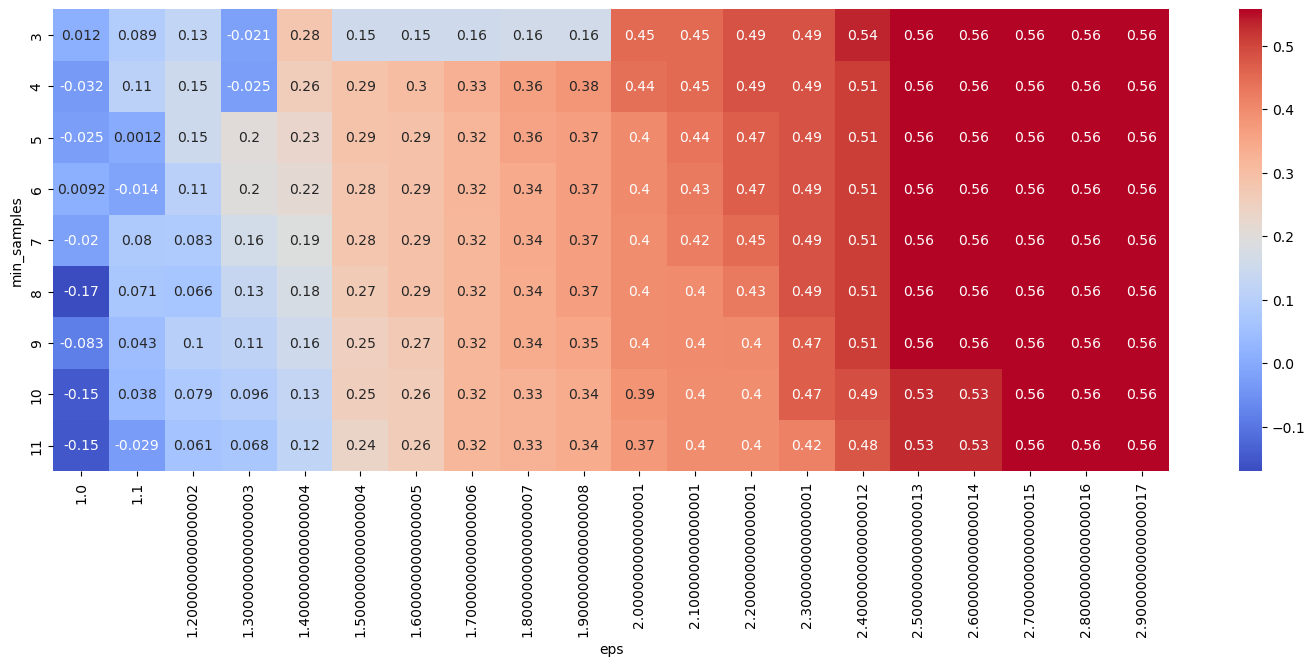

In [47]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(data=pivot_data_1, annot=True, annot_kws={'size': 10}, cmap='coolwarm', ax=ax)
plt.show()

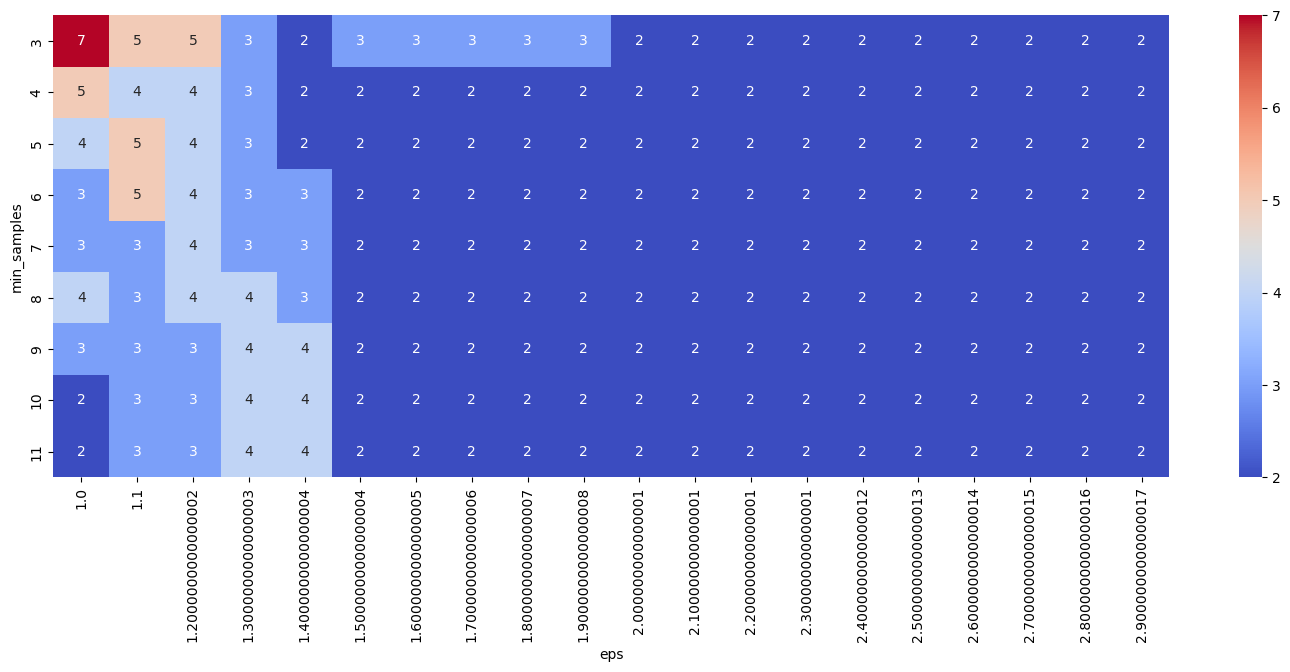

In [48]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(data=pivot_data_2, annot=True, annot_kws={'size': 10}, cmap='coolwarm', ax=ax)
plt.show()

In [49]:
dbscan = DBSCAN(eps=1.4, min_samples=6)
y_dbscan = dbscan.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_dbscan))
df_country['dbscan_cluster'] = y_dbscan

0.21539651251091044


## Evaluación de resultados

In [50]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan_cluster'],
      dtype='object')

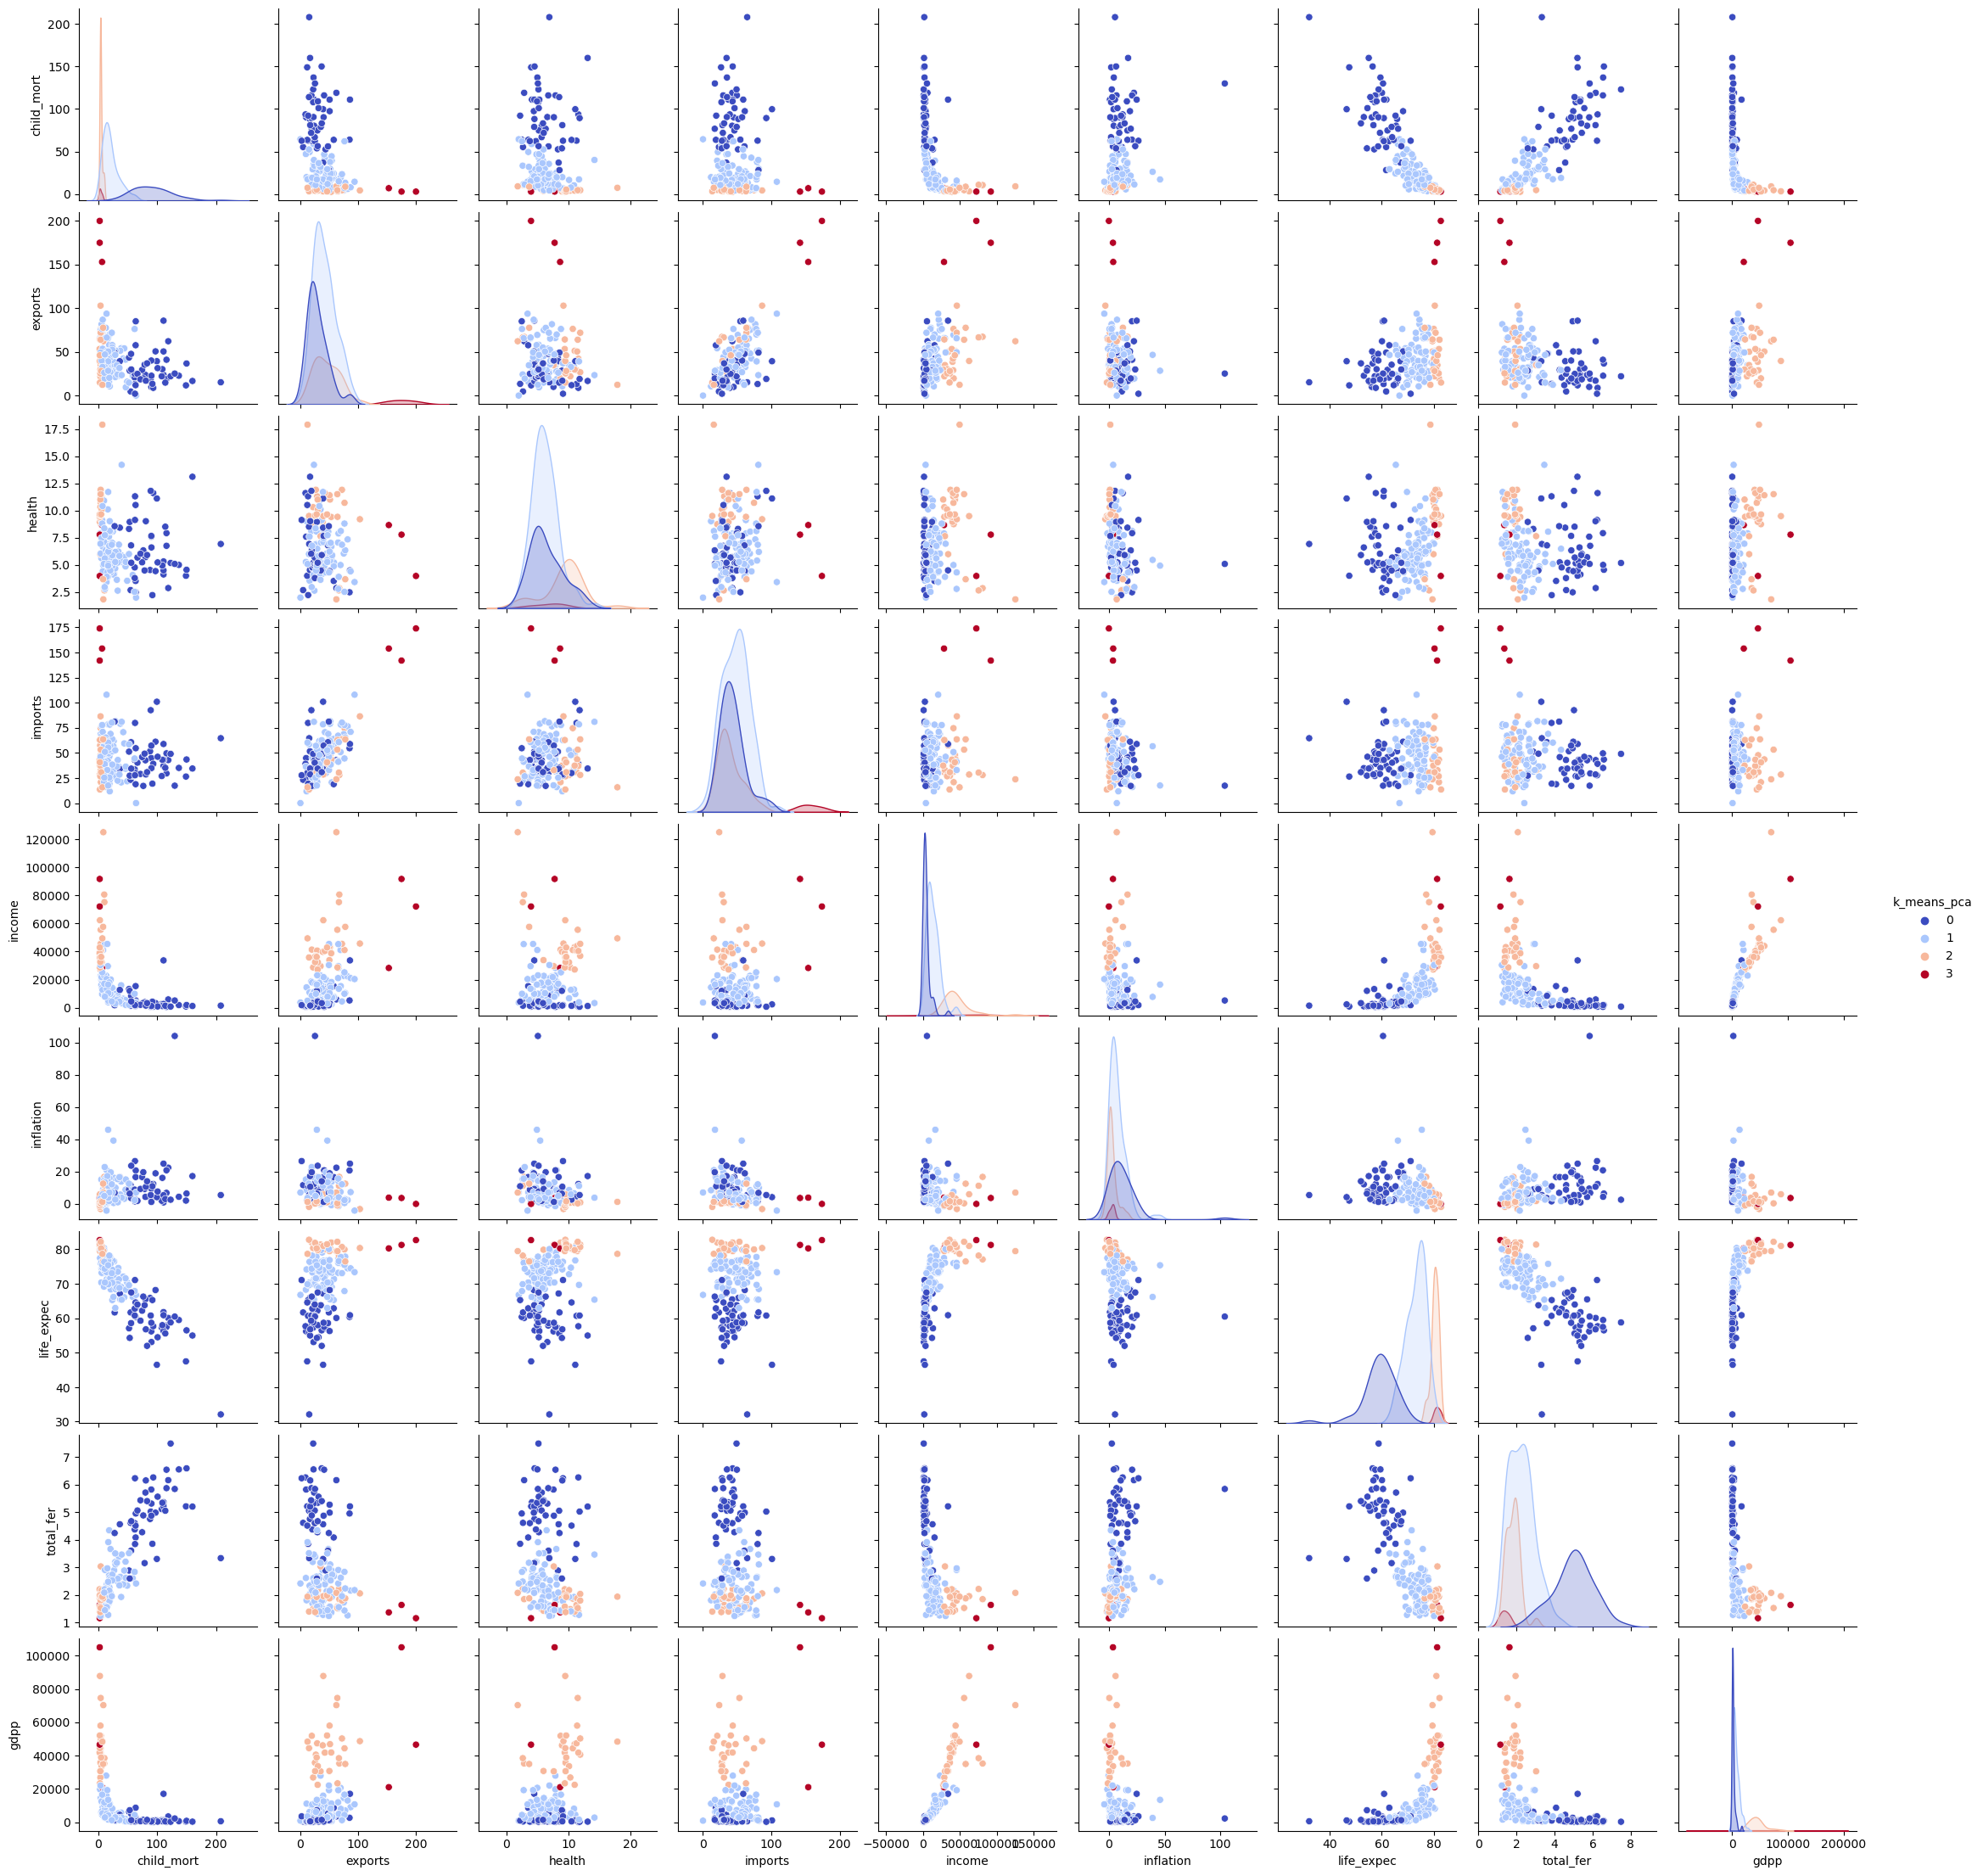

In [52]:
sns.pairplot(data= df_country[['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue='k_means_pca', palette='coolwarm')

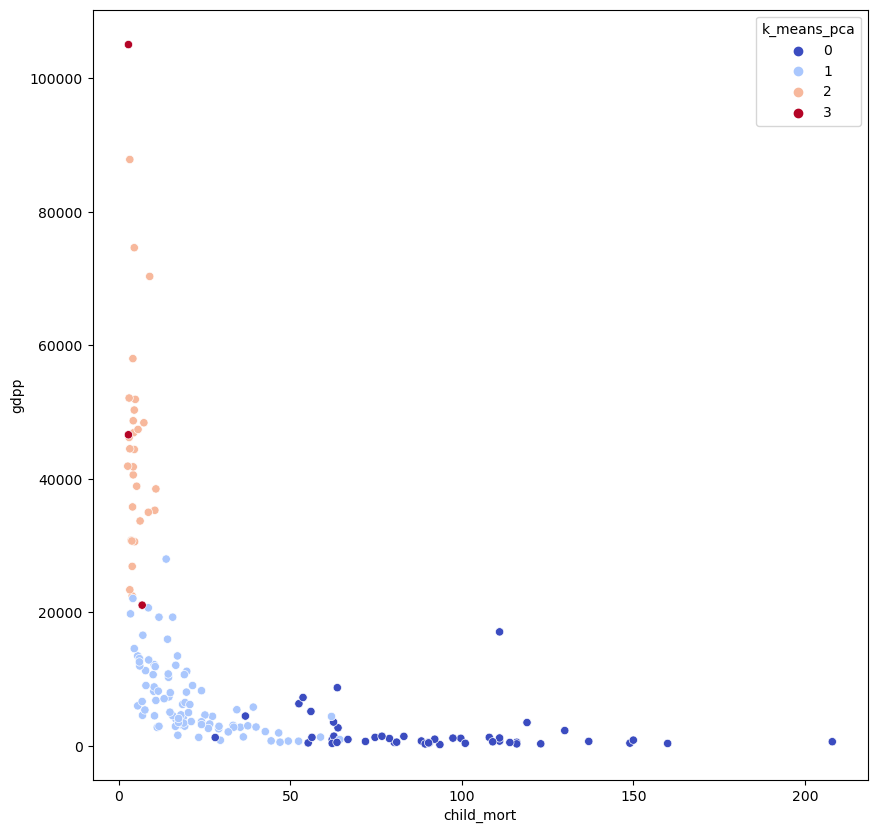

In [53]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(df_country, x='child_mort', y='gdpp', hue='k_means_pca', palette='coolwarm')
plt.show()

In [54]:
# paises con estabilidad economica mayor
df_country[df_country['k_means_pca'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,2,0,1,-1,-1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3,2,0,1,-1,-1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3,2,0,1,-1,-1


In [55]:
# paises economica mayor
df_country[df_country['k_means_pca'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,2,0,1,0,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,2,0,1,0,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2,2,0,1,0,-1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2,2,0,1,-1,-1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2,2,0,1,0,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2,2,0,0,0,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2,2,0,1,0,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2,2,0,1,0,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,2,2,0,1,0,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,2,2,0,1,0,1
